In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flights.csv', low_memory=False)

In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dap = pd.read_csv('airports.csv', low_memory=False)

In [7]:
dal = pd.read_csv('airlines.csv', low_memory=False)

In [9]:
 dal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [11]:
dal.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331120 entries, 0 to 331119
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 331120 non-null  int64  
 1   MONTH                331120 non-null  int64  
 2   DAY                  331120 non-null  int64  
 3   DAY_OF_WEEK          331120 non-null  int64  
 4   AIRLINE              331120 non-null  object 
 5   FLIGHT_NUMBER        331120 non-null  int64  
 6   TAIL_NUMBER          330600 non-null  object 
 7   ORIGIN_AIRPORT       331120 non-null  object 
 8   DESTINATION_AIRPORT  331120 non-null  object 
 9   SCHEDULED_DEPARTURE  331120 non-null  int64  
 10  DEPARTURE_TIME       325457 non-null  float64
 11  DEPARTURE_DELAY      325457 non-null  float64
 12  TAXI_OUT             325277 non-null  float64
 13  WHEELS_OFF           325277 non-null  float64
 14  SCHEDULED_TIME       331119 non-null  float64
 15  ELAPSED_TIME     

# 1. Анализ среднего времени задержки рейсов по дням недели

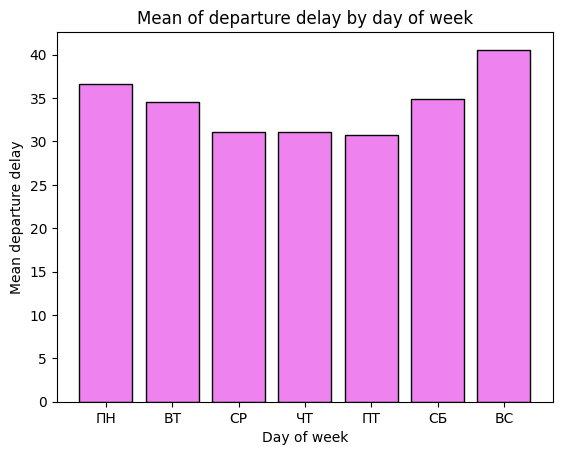

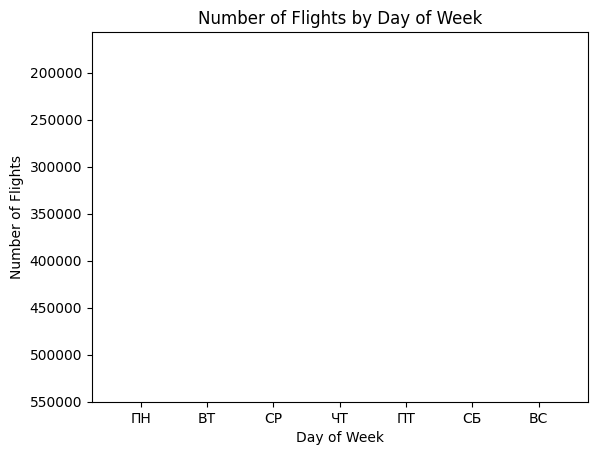

In [13]:
mean_time_delay = df[df['DEPARTURE_DELAY'] > 0].groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
num_of_flights = df.groupby('DAY_OF_WEEK')['FLIGHT_NUMBER'].count().reset_index()

custom = ['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС']

plt.bar(custom, mean_time_delay, color ='violet', edgecolor='black')
plt.title('Mean of departure delay by day of week')
plt.xlabel('Day of week')
plt.ylabel('Mean departure delay')
plt.show()

plt.bar(custom, num_of_flights['FLIGHT_NUMBER'], color='skyblue', edgecolor='black')
plt.title('Number of Flights by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.ylim(550000, num_of_flights['FLIGHT_NUMBER'].max() + 100000)
plt.axhline(y = num_of_flights['FLIGHT_NUMBER'].max(), color = 'r', linestyle = '--')
plt.show()


In [14]:
num_of_flights.sort_values(by = 'FLIGHT_NUMBER', ascending = False)

,DAY_OF_WEEK,FLIGHT_NUMBER
3,4,56917
4,5,48819
0,1,48277
2,3,46616
1,2,45682
6,7,44961
5,6,39848



Гипотеза: Среднее количество минут задержки рейса зависит от количества рейсов в день.

По первому графику видим, что в понедельник задержки максимальные, однако видим, что наибольшее количесво вылетов приходится на четверг. Значит наша гипотеза не верна и нужно смотреть другие факторы.

# 2. Анализ данных задержки рейса в зависимости от аэропорта

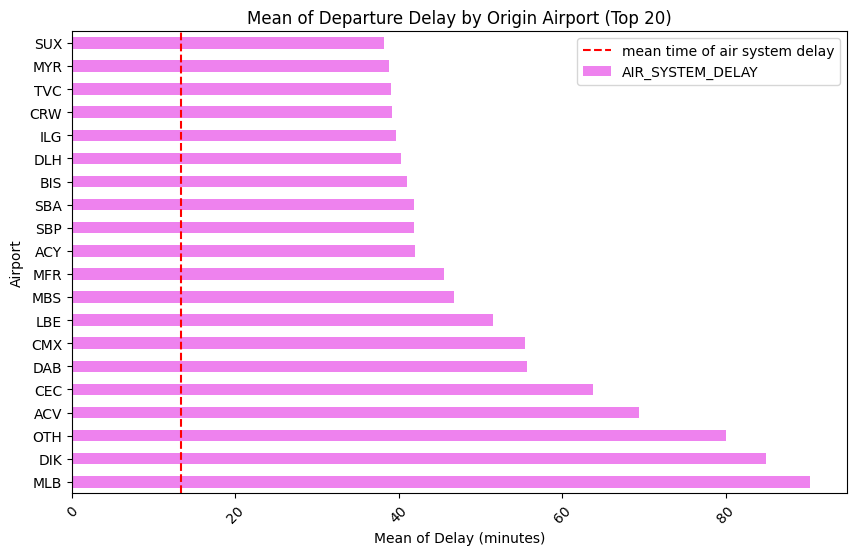

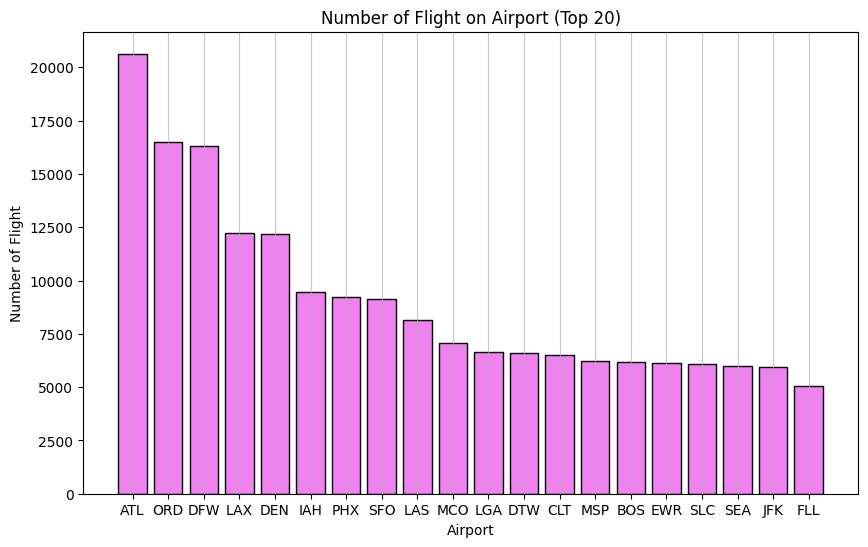

In [15]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)
df2 = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) & (df.DESTINATION_AIRPORT.apply(len) == 3)]

mean_t_d_air = df2[df2['AIR_SYSTEM_DELAY'] > 0].groupby('ORIGIN_AIRPORT')['AIR_SYSTEM_DELAY'].mean()
num_f_air = df2.groupby('ORIGIN_AIRPORT')['FLIGHT_NUMBER'].count().reset_index()
max_delays_airport = mean_t_d_air.nlargest(20)
max_fligh_airport = num_f_air.nlargest(20, columns='FLIGHT_NUMBER')

plt.figure(figsize=(10, 6))
max_delays_airport.plot(kind='barh', color='violet')
plt.xlabel('Mean of Delay (minutes)')
plt.ylabel('Airport')
plt.title('Mean of Departure Delay by Origin Airport (Top 20)')
plt.xticks(rotation=45)
plt.axvline(x = df2['AIR_SYSTEM_DELAY'].mean(), color = 'r', linestyle = '--', label = 'mean time of air system delay')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(max_fligh_airport['ORIGIN_AIRPORT'], max_fligh_airport['FLIGHT_NUMBER'], color ='violet', edgecolor='black')
plt.title('Number of Flight on Airport (Top 20)')
plt.xlabel('Airport')
plt.ylabel('Number of Flight')
plt.grid(axis = 'x', alpha = 0.7)
plt.show()

Гипотеза: Количество и время задержек увеличивается при большой загруженности аэропорта.

По первому графику можно заметить, что в аэропортах HYA и MVY задержки сильно больше. Построив диаграмму по количесву рейсов из аэропорта, замечаем что HYA и MVY не входят в топ 20 по количеству, значит можно сделать вывод, что в данных аэропортах имеются проблемы связанные либо с персоналом, либо с техническими неполадками самого аэропорта. Для точного выявления проблемы нужны дополнительные данные.

#3. Анализ зависимости среднего времени задержки рейса от авиакомпании

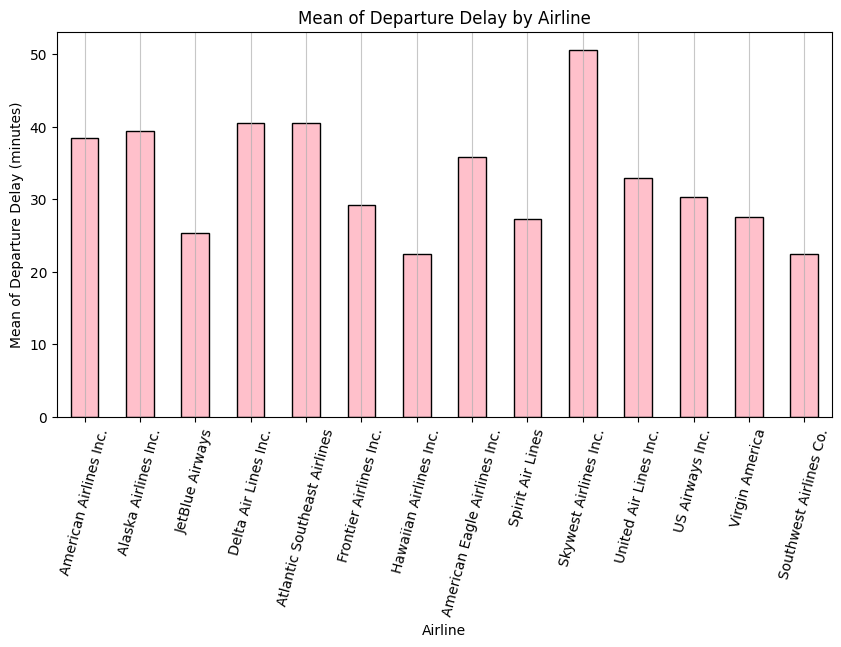

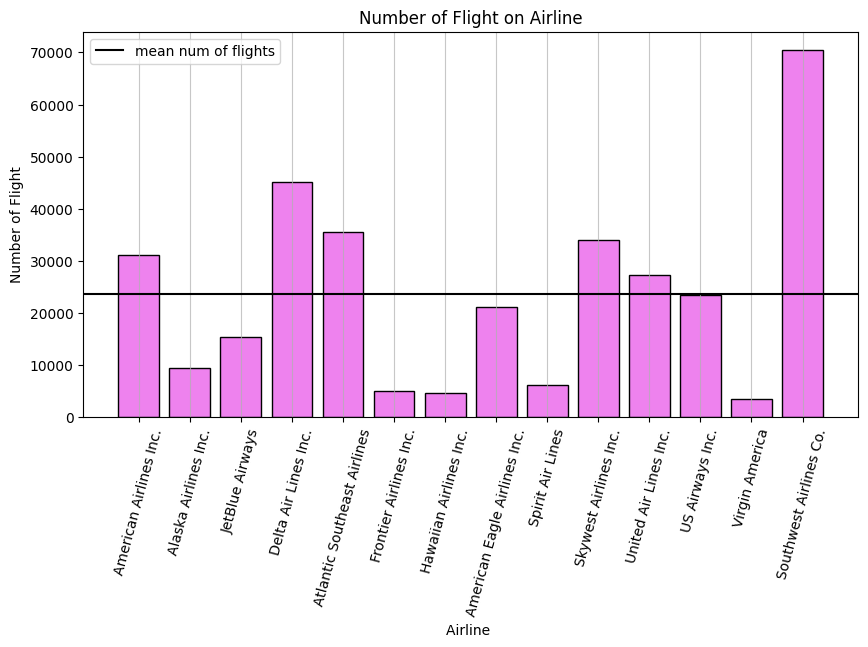

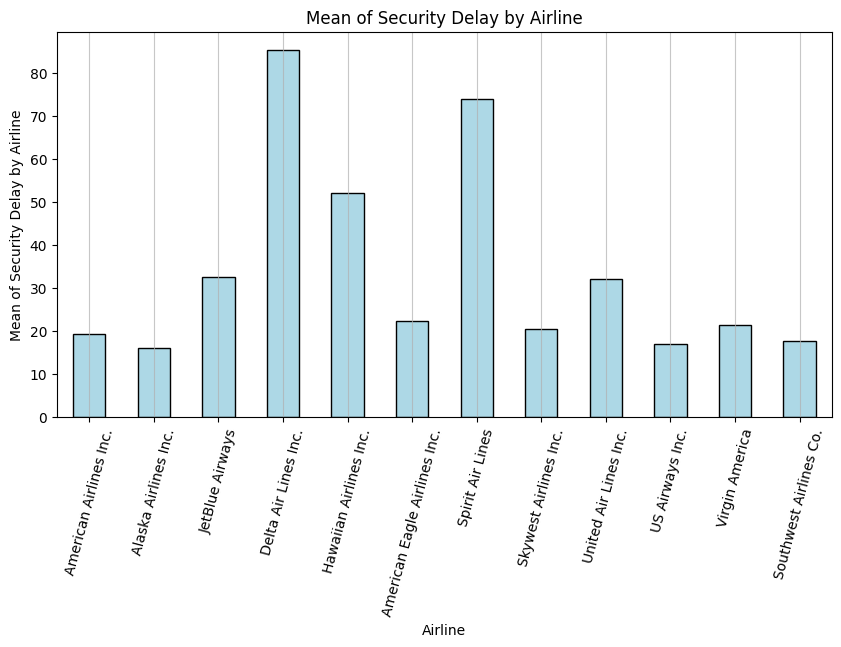

In [30]:
mean_d_air = df[df['AIRLINE_DELAY'] > 0].groupby('AIRLINE')['AIRLINE_DELAY'].mean()
num_f_on_air = df.groupby('AIRLINE')['FLIGHT_NUMBER'].count().reset_index()
mean_del_sec = df[df['SECURITY_DELAY'] > 0].groupby('AIRLINE')['SECURITY_DELAY'].mean()
code_to_name = dict(zip(dal['IATA_CODE'], dal['AIRLINE']))
mean_num_flights = df.groupby('AIRLINE')['FLIGHT_NUMBER'].count().mean()

mean_d_air.index = mean_d_air.index.map(code_to_name)

num_f_on_air['AIRLINE'] = num_f_on_air['AIRLINE'].map(code_to_name)

mean_del_sec.index = mean_del_sec.index.map(code_to_name)

plt.figure(figsize=(10, 5))
mean_d_air.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Mean of Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean of Departure Delay (minutes)')
plt.grid(axis = 'x', alpha = 0.7)
plt.xticks(rotation=75)
plt.show()

plt.figure(figsize=(10, 5))
plt.axhline(y = mean_num_flights, color = 'k', label = 'mean num of flights')
plt.bar(num_f_on_air['AIRLINE'], num_f_on_air['FLIGHT_NUMBER'], color ='violet', edgecolor='black')
plt.title('Number of Flight on Airline')
plt.xlabel('Airline ')
plt.ylabel('Number of Flight')
plt.grid(axis = 'x', alpha = 0.7)
plt.xticks(rotation=75)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
mean_del_sec.plot(kind='bar', color='lightblue',edgecolor='black')
plt.title('Mean of Security Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean of Security Delay by Airline')
plt.grid(axis = 'x', alpha = 0.7)
plt.xticks(rotation=75)
plt.show()

У авиакомпании Skywest Airlines максимальное среднее время задержания рейса.

Первая гипотеза: загруженность от количества рейсов по данной авиалинии влияет на задержки, но это оказалось неверным, т.к. по второму графику видно, что у авиалинии Skywest Airlines достаточное количество рейсов, однако максимальное число рейсов у компании Southwest Airlines, у которой не наблюдаются сильные задержки.

Вторая гипотеза - это sequrity delays (задержка из-за проблем с безопасностью), что оказалось тоже не верным, так как наибольшее значение было у компании Delta Air Lines.

# 4. Изменение задержек в зависимости от причины задержки

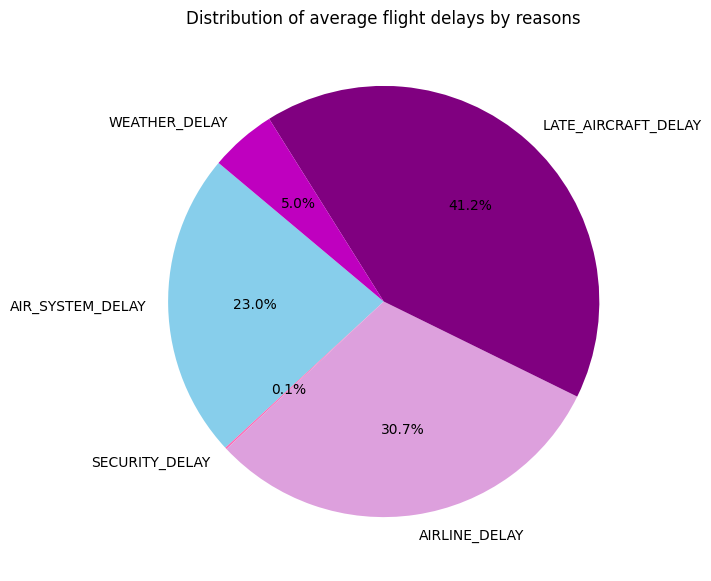

In [17]:
air_system_delay = df['AIR_SYSTEM_DELAY'].mean()
security_delay = df['SECURITY_DELAY'].mean()
airline_delay = df['AIRLINE_DELAY'].mean()
late_aircraft_delay = df['LATE_AIRCRAFT_DELAY'].mean()
weather_delay = df['WEATHER_DELAY'].mean()

data = {
    'AIR_SYSTEM_DELAY': air_system_delay,
    'SECURITY_DELAY': security_delay,
    'AIRLINE_DELAY': airline_delay,
    'LATE_AIRCRAFT_DELAY': late_aircraft_delay,
    'WEATHER_DELAY': weather_delay
}

keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(7, 7))
plt.pie(values, labels=keys, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'hotpink', 'plum', 'purple', 'm'])
plt.title('Distribution of average flight delays by reasons')
plt.show()

Большая часть опазданий (41,9%) приходтся на опоздание самолетов. Предполагаю, что это из-за  других причин задержания рейсов. Работает как снежный ком. Поэтому если уменьшить время задержки рейсов по другим причинам, то и главная причина тоже будет уменьшаться

# 5. Задержки в зависимости от времени вылета

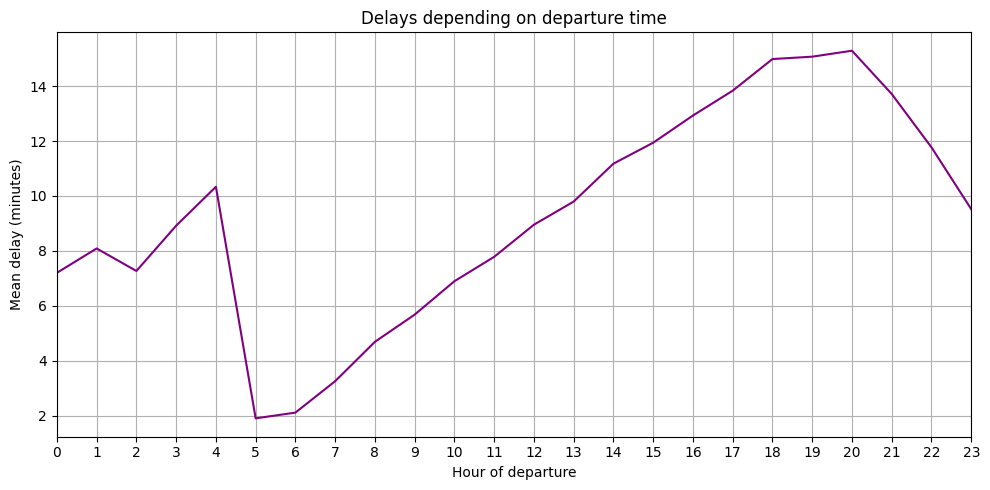

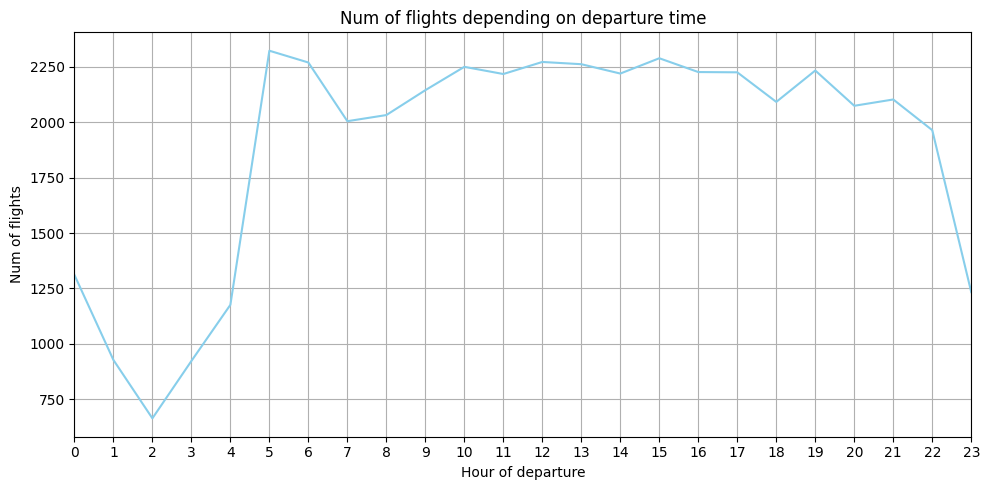

In [ ]:
df['SCHEDULED_DEPARTURE_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='SCHEDULED_DEPARTURE_HOUR', y='DEPARTURE_DELAY', errorbar=None, color = 'purple')
plt.title('Delays depending on departure time')
plt.xlabel('Hour of departure')
plt.ylabel('Mean delay (minutes)')
plt.xticks(range(0, 24))
plt.margins(x=0)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='SCHEDULED_DEPARTURE_HOUR', y=df['FLIGHT_NUMBER'], errorbar=None, color = 'skyblue')
plt.title('Num of flights depending on departure time')
plt.xlabel('Hour of departure')
plt.ylabel('Num of flights')
plt.xticks(range(0, 24))
plt.margins(x=0)
plt.tight_layout()
plt.grid(True)
plt.show()

График зависимости задержек от времени суток указывает на то, что пик приходится на 18-20 часов. Возможно, это связано с тем, что задержки работают как "снежный ком", а дальнейший спад связан с падением колличества полетов. Однако непонятен пик зарержек в 3 часа утра, когда количество рейсов минимально. Возможно это связано с нехваткой персонала в аэропортах.